In [128]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the Dataset

In [129]:
pillow_image = Image.open(
    "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
image_array = np.array(pillow_image)
print(image_array.shape)

(1152, 1422)


In [130]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1. / 255)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

In [131]:
train_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/chest_xray/train"
test_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/test"

In [132]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary"
)

test_data = valid_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    batch_size=32,
    target_size=(256, 256),
    class_mode="binary"
)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [133]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomShear(0.2)
])


In [134]:
model = tf.keras.Sequential([

    data_augmentation,

    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [135]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=["accuracy"])

In [136]:
history_1 = model.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data
                      )

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.7427 - loss: 0.5833 - val_accuracy: 0.6250 - val_loss: 0.7040
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.7333 - loss: 0.5594 - val_accuracy: 0.6122 - val_loss: 0.7056
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 230ms/step - accuracy: 0.7316 - loss: 0.5359 - val_accuracy: 0.6202 - val_loss: 0.7572
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 226ms/step - accuracy: 0.7308 - loss: 0.5178 - val_accuracy: 0.6138 - val_loss: 0.7291
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 228ms/step - accuracy: 0.7393 - loss: 0.4971 - val_accuracy: 0.6587 - val_loss: 0.6628
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.7786 - loss: 0.4542 - val_accuracy: 0.6987 - val_loss: 0.6272
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 226ms/step - accuracy: 0.7981 - loss: 0.4200 - val_accuracy: 0.7131 - val_loss: 0.5913
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 228ms/step - accuracy: 0.8102 - loss: 0

<Axes: >

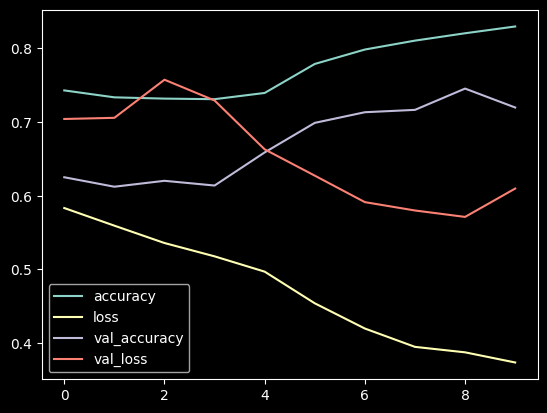

In [137]:
pd.DataFrame(history_1.history).plot()